In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [8]:
# Read bothdata set
mouse_data = pd.read_csv('./Resources/Pymaceuticals_data_Mouse_metadata.csv')
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
study_data = pd.read_csv('./Resources/Pymaceuticals_data_Study_results.csv')
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
#Merging both dataset

merge_table = pd.merge(mouse_data, study_data, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


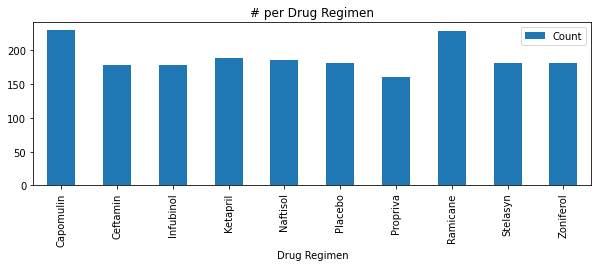

<Figure size 432x288 with 0 Axes>

In [12]:
#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows  the number of mice per time point for each treatment regimen throughout the course of the study.
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")
regimen_datapoints.plot(kind="bar", figsize=(10,3))
plt.title("# per Drug Regimen")
plt.show()
plt.tight_layout()

In [18]:
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

#PANDAS
groupby_gender = merge_table.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


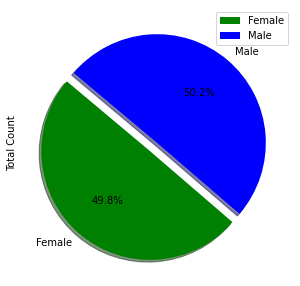

In [20]:
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

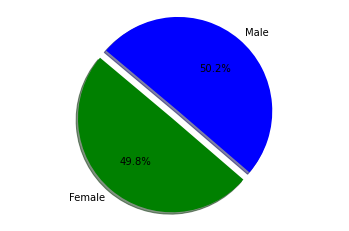

In [21]:
#PYPLOT
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['green', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

In [23]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
best_regimes = merge_table[merge_table["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [44]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

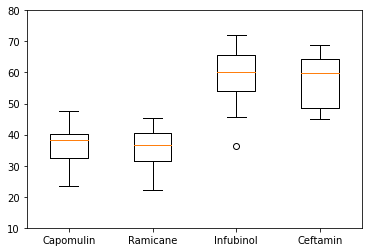

In [46]:
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df
brand_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(brand_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=brand_4)
plt.ylim(10, 80)
plt.show()

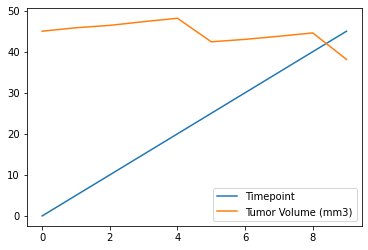

In [40]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
time_vs_tumor = merge_table[merge_table["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


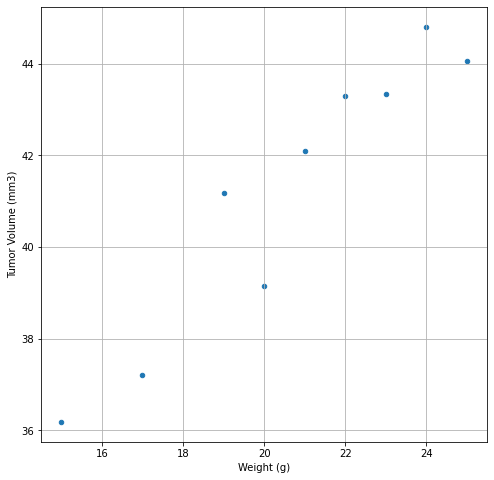

In [37]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capomulin_scatter = merge_table[merge_table["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume 
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter

In [13]:
%%



NameError: name 'capomulin_df' is not defined

In [12]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
mouse_weight = capomulin_grouped_weight.iloc[:,0]
avg_tumor_volume = capomulin_grouped_weight.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)

print(f"The correlation between both factors is {round(correlation[0],2)}")



NameError: name 'capomulin_grouped_weight' is not defined

In [11]:
x_values = capomulin_grouped_weight["Weight (g)"]
y_values = capomulin_grouped_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

NameError: name 'capomulin_grouped_weight' is not defined